In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.utils import to_categorical
import tensorflow as tf

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/IA/sensor.csv")
print(data.shape)
print(data.keys())
print(data.head())

(220320, 55)
Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')
   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-0

In [ ]:
data.dtypes

Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

In [ ]:
"""data_plot = data.drop(labels=['timestamp','machine_status'],axis=1)
for column in data_plot.columns:
  plt.plot(data_plot['Unnamed: 0'],data_plot[column])
  plt.ylabel(column)
  plt.show()"""



"data_plot = data.drop(labels=['timestamp','machine_status'],axis=1)\nfor column in data_plot.columns:\n  plt.plot(data_plot['Unnamed: 0'],data_plot[column])\n  plt.ylabel(column)\n  plt.show()"

In [ ]:
(data.isna().sum()/220320)*100

Unnamed: 0          0.000000
timestamp           0.000000
sensor_00           4.633261
sensor_01           0.167484
sensor_02           0.008624
sensor_03           0.008624
sensor_04           0.008624
sensor_05           0.008624
sensor_06           2.177741
sensor_07           2.474129
sensor_08           2.317992
sensor_09           2.085603
sensor_10           0.008624
sensor_11           0.008624
sensor_12           0.008624
sensor_13           0.008624
sensor_14           0.009532
sensor_15         100.000000
sensor_16           0.014070
sensor_17           0.020879
sensor_18           0.020879
sensor_19           0.007262
sensor_20           0.007262
sensor_21           0.007262
sensor_22           0.018609
sensor_23           0.007262
sensor_24           0.007262
sensor_25           0.016340
sensor_26           0.009078
sensor_27           0.007262
sensor_28           0.007262
sensor_29           0.032680
sensor_30           0.118464
sensor_31           0.007262
sensor_32     

In [ ]:
print( data['machine_status'].unique())
print (data['machine_status'].value_counts())

['NORMAL' 'BROKEN' 'RECOVERING']
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


In [ ]:
    le = preprocessing.LabelEncoder()
    le.fit(data['machine_status'])
    data['machine_status'] = pd.DataFrame(le.transform(data['machine_status']),columns=['target'])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


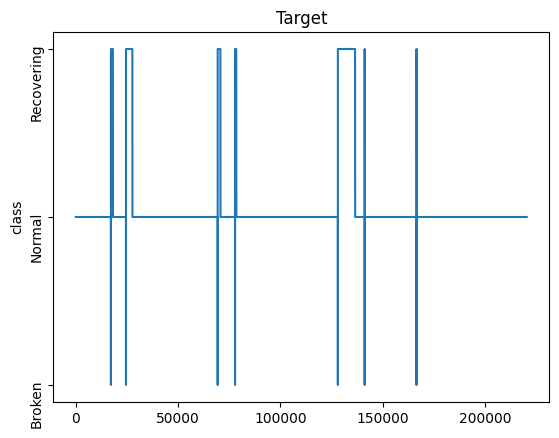

In [ ]:
    x=np.linspace(1,data.shape[0],data.shape[0])
    plt.plot(x,data['machine_status'])
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    plt.yticks([1,0,2], labels, rotation='vertical')
    plt.show()

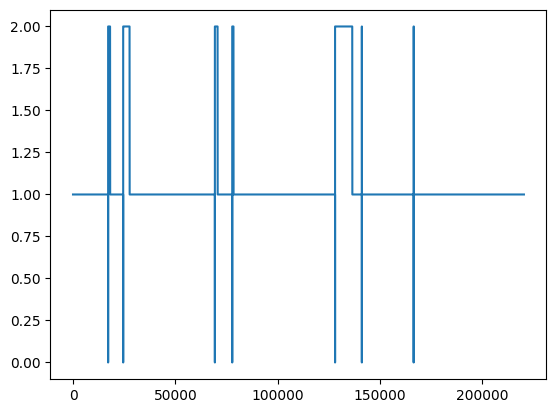

In [ ]:
plt.plot(data['Unnamed: 0'],data['machine_status'])

In [ ]:
    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000]
    data=data.drop(labels=['sensor_00','sensor_15','sensor_37','sensor_50'],axis=1)
    data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()

<ipython-input-11-b1651ff5d650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000]


In [ ]:
print((data.isna().sum()/220320)*100)
print(data.shape)

Unnamed: 0        0.0
timestamp         0.0
sensor_01         0.0
sensor_02         0.0
sensor_03         0.0
sensor_04         0.0
sensor_05         0.0
sensor_10         0.0
sensor_11         0.0
sensor_12         0.0
sensor_13         0.0
sensor_14         0.0
sensor_16         0.0
sensor_17         0.0
sensor_18         0.0
sensor_19         0.0
sensor_20         0.0
sensor_21         0.0
sensor_22         0.0
sensor_23         0.0
sensor_24         0.0
sensor_25         0.0
sensor_26         0.0
sensor_27         0.0
sensor_28         0.0
sensor_29         0.0
sensor_30         0.0
sensor_31         0.0
sensor_32         0.0
sensor_33         0.0
sensor_34         0.0
sensor_35         0.0
sensor_36         0.0
sensor_38         0.0
sensor_39         0.0
sensor_40         0.0
sensor_41         0.0
sensor_42         0.0
sensor_43         0.0
sensor_44         0.0
sensor_45         0.0
sensor_46         0.0
sensor_47         0.0
sensor_48         0.0
sensor_49         0.0
sensor_51 

In [ ]:
print(data.columns)
len(data.columns)

Index(['Unnamed: 0', 'timestamp', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18',
       'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23',
       'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28',
       'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33',
       'sensor_34', 'sensor_35', 'sensor_36', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51', 'machine_status'],
      dtype='object')


47

In [ ]:
df_train = data.drop(labels=['Unnamed: 0','timestamp'],axis=1)

In [ ]:
scaler = MinMaxScaler().fit(df_train)
df_train_scaled = scaler.transform(df_train)

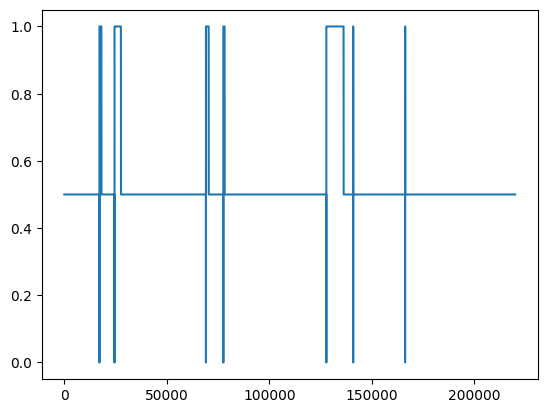

In [ ]:
plt.plot(df_train_scaled[:,-1])

In [ ]:
X = []
y = []

n_future = 1
n_past = 10

for i in range(n_past,len(df_train_scaled)-n_future+1):
  X.append(df_train_scaled[i-n_past:i,0:df_train.shape[1]])
  y.append(df_train_scaled[i+n_future-1:i+n_future,-1])

X, y = np.array(X),np.array(y)


In [ ]:
X_train=X[0:120000]
y_train=y[0:120000]

X_val=X[140000::]
y_val=y[140000::]

X_test=X[120000:140000]
y_test=y[120000:140000]




In [ ]:
    oneHot=OneHotEncoder()
    oneHot.fit(y.reshape(-1,1))

    y_train = oneHot.transform(y_train.reshape(-1,1)).toarray()
    y_val  = oneHot.transform(y_val.reshape(-1,1)).toarray()
    y_test = oneHot.transform(y_test.reshape(-1,1)).toarray()

In [ ]:
y_train.shape

(120000, 3)

In [ ]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [ ]:
model = Sequential()
model.add(LSTM(32,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 32)            9984      
                                                                 
 lstm_9 (LSTM)               (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 18403 (71.89 KB)
Trainable params: 18403 (71.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train,y_train,epochs=15,batch_size=32, validation_data=(X_val,y_val), shuffle=False)

Epoch 1/15
3750/3750 [==============================] - 54s 14ms/step - loss: 0.4299 - accuracy: 0.9574 - val_loss: 0.0097 - val_accuracy: 0.9985
Epoch 2/15
3750/3750 [==============================] - 60s 16ms/step - loss: 0.2860 - accuracy: 0.9723 - val_loss: 0.0228 - val_accuracy: 0.9985
Epoch 3/15
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1741 - accuracy: 0.9689 - val_loss: 0.0171 - val_accuracy: 0.9985
Epoch 4/15
3750/3750 [==============================] - 53s 14ms/step - loss: 0.0983 - accuracy: 0.9614 - val_loss: 0.0073 - val_accuracy: 0.9989
Epoch 5/15
3750/3750 [==============================] - 54s 14ms/step - loss: 0.0548 - accuracy: 0.9776 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 6/15
3750/3750 [==============================] - 61s 16ms/step - loss: 0.0678 - accuracy: 0.9815 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 7/15
3750/3750 [==============================] - 59s 16ms/step - loss: 0.1688 - accuracy: 0.9879 - val_loss: 0.0089 -

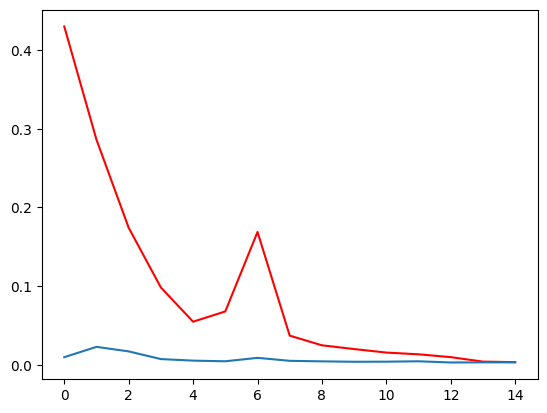

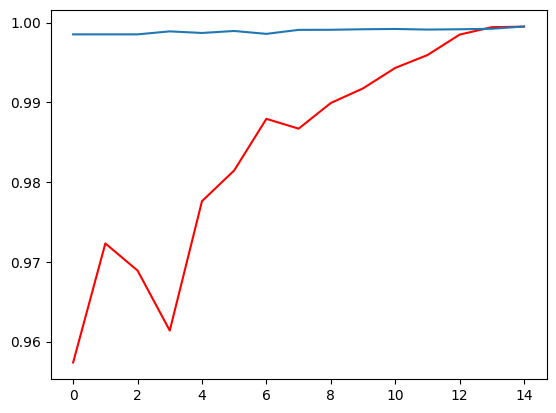

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
y_pred= model.predict(X_test)

625/625 [==============================] - 9s 12ms/step


In [ ]:
Y_pred_class=[np.argmax(y_pred[i],0) for i in range(len(y_pred))]

In [ ]:
y_target = data['machine_status'].values
y_prueba = y_target[120000:140000]

y_prueba_scaled = oneHot.inverse_transform(y_test)


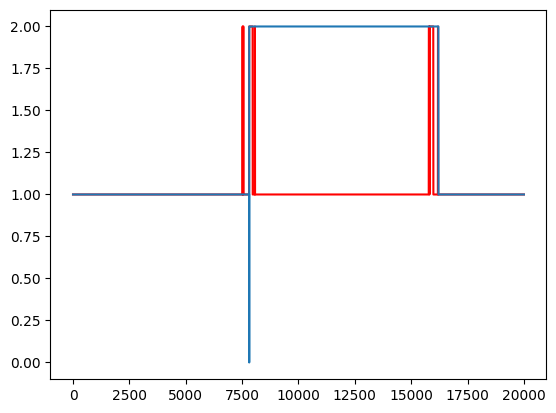

In [ ]:
fig= plt.figure()
plt.plot(Y_pred_class,'r')
plt.plot(y_prueba)

In [ ]:
yclass2= model.predict(X_val)

2497/2497 [==============================] - 18s 7ms/step


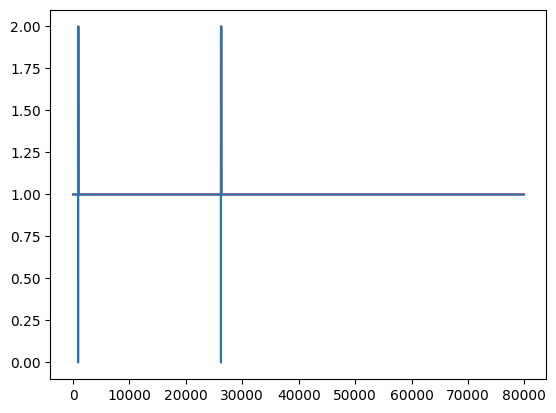

In [ ]:
Yclass2=[np.argmax(yclass2[i],0) for i in range(len(yclass2))]
fig2= plt.figure()
plt.plot(Yclass2,'r')
plt.plot(y_target[140000::])

In [ ]:
y_pred_train = model.predict(X_train)
y_class_train=[np.argmax(y_pred_train[i],0) for i in range(len(y_pred_train))]

3750/3750 [==============================] - 17s 5ms/step


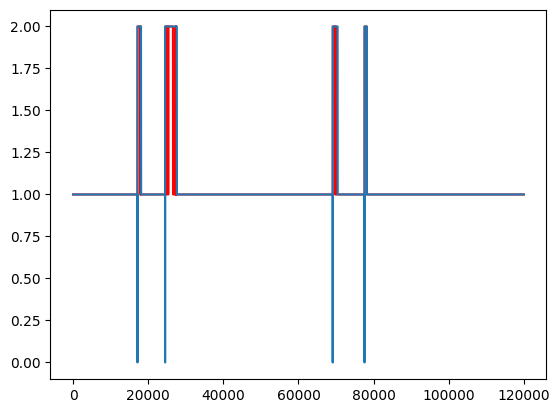

In [ ]:
fig3= plt.figure()
plt.plot(y_class_train,'r')
plt.plot(y_target[0:120000])